In [4]:
import numpy as np
import pandas as pd
import ruptures as rpt
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [5]:
# df = pd.read_csv("../Datasets/household_data_1min_singleindex.csv", parse_dates=["utc_timestamp", "cet_cest_timestamp"])
# df.head()
# df.describe()
# df.info()
# df.drop(df.columns[df.columns.str.contains("industrial")], axis=1, inplace=True)
# df.to_pickle("../Datasets/no_industrial_df.pickle")

In [6]:
df = pd.read_pickle("../Datasets/no_industrial_df.pickle")
df.head()

,utc_timestamp,cet_cest_timestamp,DE_KN_public1_grid_import,DE_KN_public2_grid_import,DE_KN_residential1_dishwasher,DE_KN_residential1_freezer,DE_KN_residential1_grid_import,DE_KN_residential1_heat_pump,DE_KN_residential1_pv,DE_KN_residential1_washing_machine,...,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
0,2014-12-11 17:59:00+00:00,2014-12-11 18:59:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11 18:00:00+00:00,2014-12-11 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11 18:01:00+00:00,2014-12-11 19:01:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11 18:02:00+00:00,2014-12-11 19:02:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11 18:03:00+00:00,2014-12-11 19:03:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(1, 7):
    res_df = df[df.columns[df.columns.str.contains(f"residential{i}")]]
    print(f'Redidential {i}:', df.columns.str.contains(f"residential{i}").sum(), res_df.notnull().sum().sum() / np.product(res_df.shape), sep="\t")

Redidential 1:	6	0.3996241944728226
Redidential 2:	5	0.4667290528981207
Redidential 3:	8	0.6621601355448515
Redidential 4:	9	0.43227440964849256
Redidential 5:	4	0.601044889913152
Redidential 6:	7	0.4661736944882303


In [8]:
df3 = df[df.columns[df.columns.str.contains("residential3")].tolist() + ["utc_timestamp"]].copy()
df4 = df[df.columns[df.columns.str.contains("residential4")].tolist() + ["utc_timestamp"]].copy()
# del df

In [9]:
df3.describe()

,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine
count,1.992576e+06,1.745742e+06,1.723855e+06,1.353257e+06,714159.000000,1.353256e+06,1.505981e+06,1.832706e+06
mean,9.501481e+02,7.131943e+02,2.681584e+02,4.379180e+03,2508.730502,6.617964e+03,2.592242e+02,9.989745e+02
std,5.263461e+02,3.252883e+02,1.127242e+02,2.498119e+03,1516.856240,3.714973e+03,1.661289e+02,5.530942e+02
min,0.000000e+00,0.000000e+00,2.000000e-03,0.000000e+00,0.007000,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.623528e+02,4.694310e+02,2.126695e+02,2.668843e+03,1196.114000,3.941027e+03,1.056820e+02,5.324520e+02
50%,9.198955e+02,7.962020e+02,3.221780e+02,4.190434e+03,2325.950000,6.592381e+03,2.506040e+02,1.042498e+03
75%,1.372459e+03,9.863240e+02,3.662680e+02,6.159709e+03,3981.188000,9.405719e+03,4.051740e+02,1.485650e+03
max,1.777363e+03,1.175990e+03,3.662680e+02,9.388804e+03,5778.129000,1.367366e+04,5.533620e+02,1.878474e+03


In [10]:
df3_normalized = (df3
    .set_index("utc_timestamp")
    .sort_index()
    .ffill()
    .dropna(how="all")
    .fillna(0)
    .diff(1)
    .assign(
        energy_consumption = lambda x: x[["DE_KN_residential3_circulation_pump", "DE_KN_residential3_dishwasher", "DE_KN_residential3_freezer", "DE_KN_residential3_refrigerator", "DE_KN_residential3_washing_machine"]].sum(axis=1)
    )
)

<AxesSubplot: xlabel='utc_timestamp'>

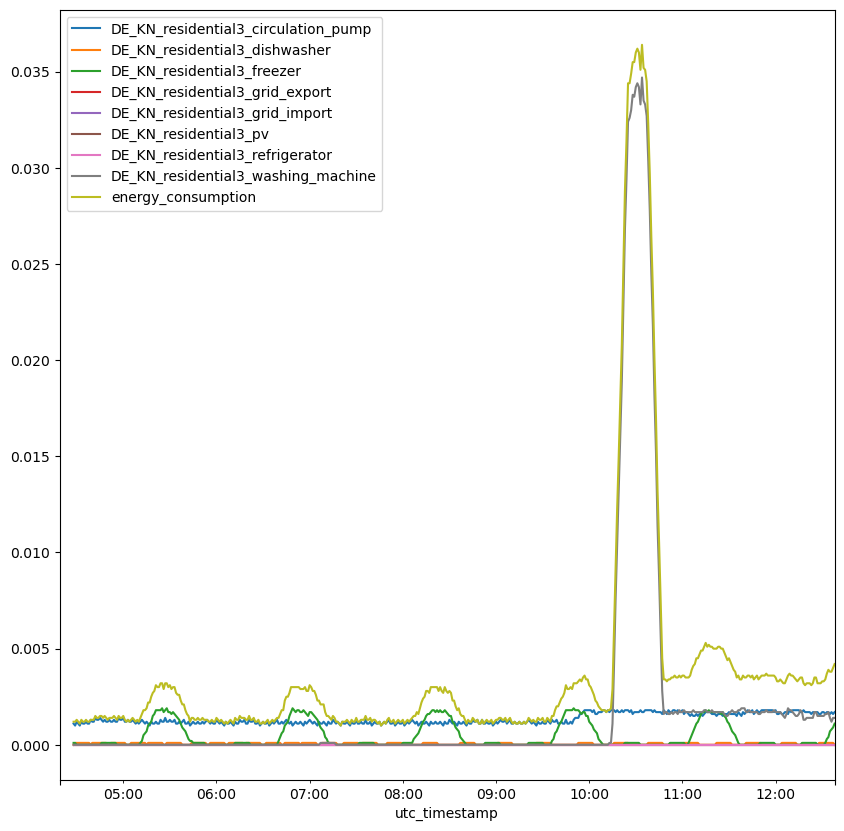

In [11]:
df3_normalized.iloc[3_500:4_000].rolling(10).mean().plot(figsize=(10, 10))

In [12]:
result = []
df3_normalized_nona = df3_normalized.dropna()[:1_000_000]
for i in tqdm(list(range(df3_normalized_nona.shape[0] // 10_000))):
    algo = rpt.Pelt(model="rbf").fit(df3_normalized_nona.energy_consumption.iloc[(10_000*i):(10_000 * (i + 1))].values)
    tmp = np.array(algo.predict(pen=3)) + (10_000*i)
    result.extend(tmp)
    print(i, end=" ")

  0%|          | 0/100 [00:00<?, ?it/s]

0 1 2 3 

KeyboardInterrupt: 

In [13]:
result = np.load("result.npy")

In [53]:
result = result.tolist()
result.insert(0, 0)
result = np.array(result)

In [14]:
df3_normalized_nona.energy_consumption.shape

(1000000,)

In [15]:
df3_mod_list = []
for start, end in zip(result[:-1], result[1:]):
    df3_mod_list.append(df3_normalized_nona[start:end].mean())

df3_modified = pd.DataFrame(df3_mod_list)
df3_modified.loc[:, "start"] = result[:-1]
df3_modified.loc[:, "end"] = result[1:]
df3_modified.loc[:, "step"] = result[1:] - result[:-1]
df3_modified.head()

,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine,energy_consumption,start,end,step
0,0.001133,0.000033,0.000083,0.0,0.0,0.0,0.0,0.0,0.001250,15,75,60
1,0.001150,0.000050,0.001700,0.0,0.0,0.0,0.0,0.0,0.002900,75,95,20
2,0.001154,0.000046,0.000077,0.0,0.0,0.0,0.0,0.0,0.001277,95,160,65
3,0.001100,0.000050,0.001750,0.0,0.0,0.0,0.0,0.0,0.002900,160,180,20
4,0.001154,0.000031,0.000123,0.0,0.0,0.0,0.0,0.0,0.001308,180,245,65


In [16]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
model = LinearRegression()

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [20]:
cols = ["DE_KN_residential3_circulation_pump", "DE_KN_residential3_dishwasher", "DE_KN_residential3_freezer", "DE_KN_residential3_refrigerator", "DE_KN_residential3_washing_machine"]

In [37]:
X = df3_modified.loc[:, ["energy_consumption", "step"]].values
y = df3_modified.loc[:, cols].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [40]:
pred_y = model.predict(X_test)

In [41]:
pred_full_y = model.predict(X)

In [42]:
df3_modified.loc[:, [col + "_pred" for col in cols]] = pred_full_y

In [43]:
df3_modified

,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine,energy_consumption,start,end,step,DE_KN_residential3_circulation_pump_pred,DE_KN_residential3_dishwasher_pred,DE_KN_residential3_freezer_pred,DE_KN_residential3_refrigerator_pred,DE_KN_residential3_washing_machine_pred
0,0.001133,0.000033,0.000083,0.0,0.000000,0.0,0.000000,0.000000,0.001250,15,75,60,0.001150,0.000040,0.000053,0.000007,0.000000
1,0.001150,0.000050,0.001700,0.0,0.000000,0.0,0.000000,0.000000,0.002900,75,95,20,0.001160,0.000050,0.001680,0.000010,0.000000
2,0.001154,0.000046,0.000077,0.0,0.000000,0.0,0.000000,0.000000,0.001277,95,160,65,0.001154,0.000043,0.000080,0.000000,0.000000
3,0.001100,0.000050,0.001750,0.0,0.000000,0.0,0.000000,0.000000,0.002900,160,180,20,0.001160,0.000050,0.001680,0.000010,0.000000
4,0.001154,0.000031,0.000123,0.0,0.000000,0.0,0.000000,0.000000,0.001308,180,245,65,0.001194,0.000040,0.000071,0.000000,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19878,0.001154,0.000077,0.000000,0.0,0.025754,0.0,0.000492,0.021523,0.023246,999725,999790,65,0.001132,0.006200,0.000274,0.000311,0.015406
19879,0.001144,0.000089,0.000000,0.0,0.004856,0.0,0.000411,0.000478,0.002122,999790,999880,90,0.001007,0.000116,0.000102,0.000502,0.000411
19880,0.001091,0.000091,0.000000,0.0,0.004455,0.0,0.000000,0.000218,0.001400,999880,999935,55,0.000989,0.000047,0.000182,0.000138,0.000044
19881,0.001089,0.000067,0.000000,0.0,0.003644,0.0,0.000778,0.000000,0.001933,999935,999980,45,0.001102,0.000058,0.000018,0.000756,0.000000


<AxesSubplot: >

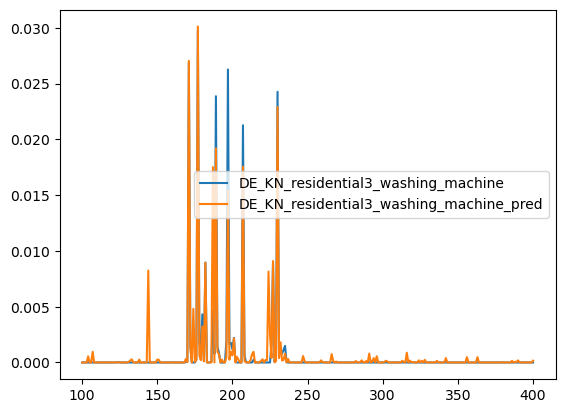

In [44]:
df3_modified.loc[100:400, ["DE_KN_residential3_washing_machine", "DE_KN_residential3_washing_machine_pred"]].plot()

<AxesSubplot: >

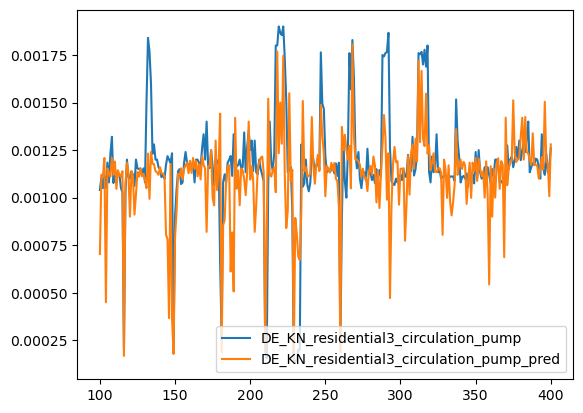

In [45]:
df3_modified.loc[100:400, ["DE_KN_residential3_circulation_pump", "DE_KN_residential3_circulation_pump_pred"]].plot()

<AxesSubplot: >

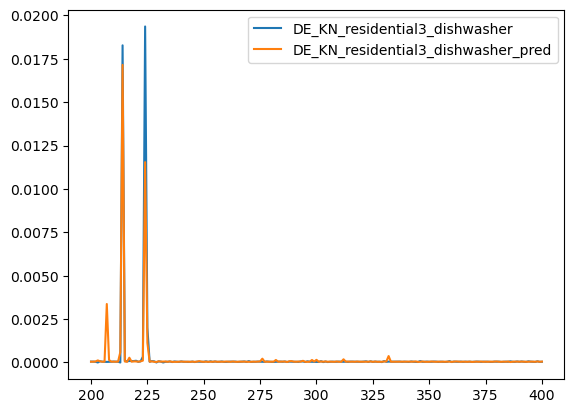

In [46]:
df3_modified.loc[200:400, ["DE_KN_residential3_dishwasher", "DE_KN_residential3_dishwasher_pred"]].plot()

<AxesSubplot: >

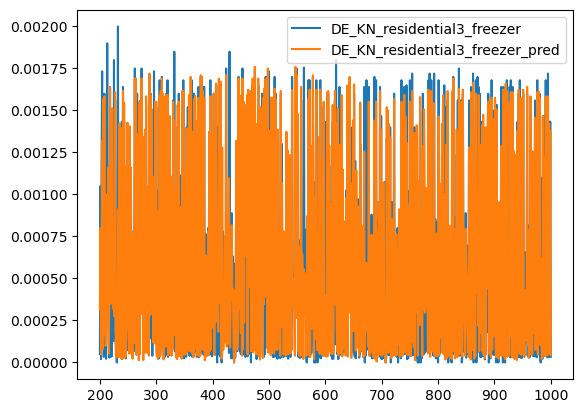

In [47]:
df3_modified.loc[200:1000, ["DE_KN_residential3_freezer", "DE_KN_residential3_freezer_pred"]].plot()

<AxesSubplot: >

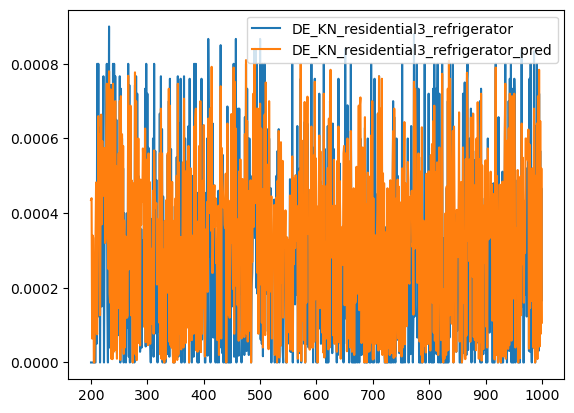

In [48]:
df3_modified.loc[200:1000, ["DE_KN_residential3_refrigerator", "DE_KN_residential3_refrigerator_pred"]].plot()

In [33]:
mean_absolute_percentage_error(y_test, pred_y)

283845194825.63855

In [34]:
np.sqrt(mean_squared_error(y_test, pred_y))

0.001463642616585879

In [35]:
0.005**2

2.5e-05